In [5]:
import pandas as pd

df =pd.read_csv('bike_usage_0.csv', encoding='CP949')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36595 entries, 0 to 36594
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date_out         36595 non-null  object
 1   Time_out         36595 non-null  int64 
 2   Station_no_out   36595 non-null  int64 
 3   Station_out      36595 non-null  object
 4   Membership_type  36595 non-null  object
 5   Gender           18262 non-null  object
 6   Age_Group        36595 non-null  object
 7   Momentum         36595 non-null  object
 8   Station_no_in    36595 non-null  int64 
 9   Station_in       36595 non-null  object
 10  Date_in          36595 non-null  object
 11  Bike_no          36595 non-null  object
 12  Carbon_amount    36595 non-null  object
 13  Distance         36595 non-null  int64 
 14  Duration         36595 non-null  int64 
dtypes: int64(5), object(10)
memory usage: 4.2+ MB


In [7]:
df.head()

,Date_out,Time_out,Station_no_out,Station_out,Membership_type,Gender,Age_Group,Momentum,Station_no_in,Station_in,Date_in,Bike_no,Carbon_amount,Distance,Duration
0,2019-10-03,0,129,129. 신촌역(2호선) 6번출구 옆,정기권,NaN,~10대,28.27,122,신성기사식당 앞,2019-10-03 오전 12:20:42,SPB-15000,0.24,1050,5
1,2019-10-03,0,150,150. 서강대역 2번출구 앞,정기권,NaN,20대,146.46,2065,서울시여성가족재단,2019-10-03 오전 1:16 2,SPB-13087,1.32,5690,32
2,2019-10-03,0,240,240. 문래역 4번출구 앞,정기권,NaN,20대,37.13,245,삼성생명 당산사옥 앞,2019-10-03 오전 12:18:21,SPB-23229,0.29,1250,10
3,2019-10-03,0,623,623. 서울시립대 정문 앞,정기권,NaN,20대,134.62,1346,길음8골어린이공원 옆,2019-10-03 오전 1:15:39,SPB-14181,1.21,5230,24
4,2019-10-03,0,633,633. 청량리 기업은행 앞,정기권,NaN,20대,85.83,568,청계8가사거리 부근,2019-10-03 오전 12:17:58,SPB-15221,0.67,2890,11


In [12]:
import pandas as pd

df =pd.read_csv('bike_usage_0.csv', encoding='CP949')
print(type(df['Date_in'].values)) ##numpy.ndarray
print(type(df['Date_in'].values[0])) ##str
df['Date_in'] = df['Date_in'].str.replace('오전', 'AM').str.replace('오후', 'PM')

# 날짜 형식 변환, Date_in 의 type 을 pandas datetime 클래스로 바꿔줘야함 
df['Date_in'] = pd.to_datetime(df['Date_in'], format='%Y-%m-%d %p %I:%M:%S', errors='coerce')

print(type(df['Date_in'].values))  # numpy.ndarray
print(type(df['Date_in'].values[0]))  # numpy.datetime64
print(df['Date_in'].values[0])  # 시계열 데이터 값

<class 'numpy.ndarray'>
<class 'str'>
<class 'numpy.ndarray'>
<class 'numpy.datetime64'>
2019-10-03T00:20:42.000000000


In [7]:
type(df['Date_in'].values)
type(df['Date_in'].values[0])
df['Date_in'].values[0]

numpy.datetime64('2019-10-03T00:20:42.000000000')

In [8]:
type(df.iloc[0]['Date_in'])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
df_part = df.iloc[:5]

In [13]:
# 날짜를 내림차순으로 정렬
df = df.sort_values(by='Date_in', ascending=False).reset_index(drop=True)


In [14]:
df.head()

,Date_out,Time_out,Station_no_out,Station_out,Membership_type,Gender,Age_Group,Momentum,Station_no_in,Station_in,Date_in,Bike_no,Carbon_amount,Distance,Duration
0,2019-10-05,23,186,186. 월드컵공원,일일권,NaN,20대,254.47,907,CJ 드림시티,2019-10-06 02:00:47,SPB-04304,2.48,10710,132
1,2019-10-05,23,186,186. 월드컵공원,정기권,NaN,20대,230.87,907,CJ 드림시티,2019-10-06 02:00:18,SPB-04841,2.46,10600,133
2,2019-10-05,23,2220,2220. 반포본동 주민센터 앞,일일권,NaN,20대,127.44,843,녹사평역 광장,2019-10-06 01:48:01,SPB-25144,1.46,6310,131
3,2019-10-05,23,143,143. 공덕역 2번출구,일일권,F,30대,77.43,143,공덕역 2번출구,2019-10-06 01:32:50,SPB-15563,0.97,4160,108
4,2019-10-05,23,437,437. 대흥역 1번출구,일일권,M,20대,346.1,437,대흥역 1번출구,2019-10-06 01:26:17,SPB-25415,2.67,11500,109


In [15]:
import matplotlib.font_manager as fm 
## 폰트 리스트 확인 gothic
fonts = [f.name for f in fm.fontManager.ttflist ] 
for font in fonts:
    if 'gothic' in font.lower():
        print(font)

Yu Gothic
MS Gothic
Franklin Gothic Medium
Malgun Gothic
Yu Gothic
Malgun Gothic
Yu Gothic
Malgun Gothic
Franklin Gothic Medium
Yu Gothic


In [55]:
df2 = pd.read_csv('stations.csv')
df2.head()

,Gu,ID,Station,Address,Latitude,Longitude,Date,No_of_Racks
0,마포구,101,101. (구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754,2015-09-06 23:40,5
1,마포구,102,102. 망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06 23:42,20
2,마포구,103,103. 망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06 23:43,14
3,마포구,104,104. 합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06 23:44,13
4,마포구,105,105. 합정역 5번출구 앞,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06 23:45,5


In [56]:
df3 = pd.read_csv('weather.csv')
df3.head()

,date_old,date,time,temp,cum_precipitation,humidity,insolation,sunshine,wind,wind_direction,sea_lvl_pressure,pressure
0,2019-10-03 오전 12:00:00,2019-10-03,12,20.0,23.2,94.1,3.4,0,5.5,351.7,1004.1,994.2
1,2019-10-03 오전 12:01:00,2019-10-03,12,20.1,0.0,94.1,0.0,0,3.7,348.6,1004.1,994.2
2,2019-10-03 오전 12:02:00,2019-10-03,12,20.0,0.0,94.1,0.0,0,3.6,346.4,1004.1,994.2
3,2019-10-03 오전 12:03:00,2019-10-03,12,20.0,0.0,94.1,0.0,0,3.1,349.1,1004.1,994.2
4,2019-10-03 오전 12:04:00,2019-10-03,12,20.0,0.0,94.0,0.0,0,3.4,335.9,1004.1,994.2


# 결측값 처리하고 시작하기

### 해볼 수 있는 것 . 순서대로 풀지 않아도 됨. 팀 별 분석 아이디어 구현이 더 중요


<class 'numpy.ndarray'>
<class 'str'>
{'~10대': 0, '20대': 1, '30대': 2, '40대': 3, '50대': 4, '60대': 5, '70대~': 6}
  Age_Group         mean          std
0         0  4161.110588  5558.658995
1         1  3946.911197  5460.781507
2         2  4387.798967  5901.820450
3         3  4486.894075  5875.948353
4         4  4346.996280  5707.191318
5         5  4503.493078  6889.287917
6         6  3874.754098  3889.716058


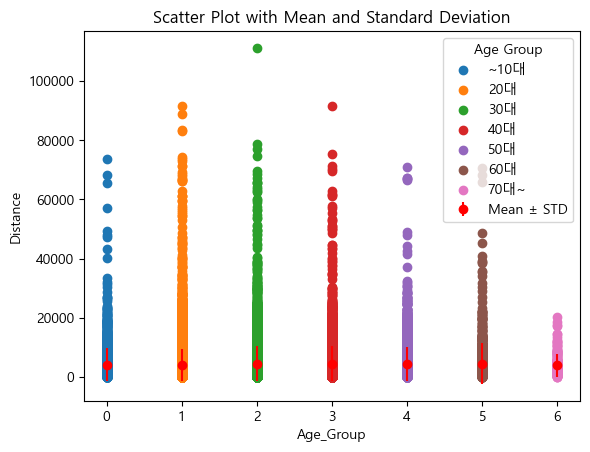

In [60]:
# 문제 1 
# 연령과 주행 거리의 관계 그래프 
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
plt.rc('font', family='Malgun Gothic') #폰트 맑음 고딕
plt.rcParams['axes.unicode_minus'] = False # 숫자 기호 깨짐 방지

df =pd.read_csv('bike_usage_0.csv', encoding='CP949')
print(type(df['Date_in'].values)) ##numpy.ndarray
print(type(df['Date_in'].values[0])) ##str
df['Date_in'] = df['Date_in'].str.replace('오전', 'AM').str.replace('오후', 'PM')
df['Date_in'] = pd.to_datetime(df['Date_in'], format='%Y-%m-%d %p %I:%M:%S', errors='coerce')

# df['Age_Group'].hist()
# plt.show()

# Age_Group의 범주형 데이터 순서 지정
age_categories = ['~10대', '20대', '30대', '40대', '50대', '60대', '70대~']
df['Age_Group'] = pd.Categorical(df['Age_Group'], categories=age_categories, ordered=True)

# 히스토그램 생성
# ax = df['Age_Group'].value_counts(sort=False).plot(kind='bar')
# plt.show()

category_mapping = {a:i for i, a in enumerate(age_categories)}
print(category_mapping)

# 범주형 데이터를 숫자형 데이터로 변환, 연령을 그래프로 찍기 위해서 
df['Age_Group'] = df['Age_Group'].map(category_mapping)
reverse_mapping = {v: k for k, v in category_mapping.items()}  # legend에 보기 편하게 remapping 정보
# df.plot.scatter(x='Age_Group', y='Distance')
# plt.show()
# 그래프 생성
fig, ax = plt.subplots()

# 카테고리별 데이터 산점도
for category in df['Age_Group'].unique():
    subset = df[df['Age_Group'] == category]
    ax.scatter(subset['Age_Group'], subset['Distance'], label=f'{reverse_mapping[category]}')
    

# 카테고리형 데이터 기준으로 그룹바이하여 평균과 표준편차 계산
grouped = df.groupby('Age_Group', observed=True)['Distance'].agg(['mean', 'std']).reset_index() 
print(grouped)
# 평균과 표준편차 에러바 추가
ax.errorbar(grouped['Age_Group'], grouped['mean'], yerr=grouped['std'], fmt='o', color='red', label='Mean ± STD')

# 그래프 레이블 설정
ax.set_xlabel('Age_Group')
ax.set_ylabel('Distance')
ax.set_title('Scatter Plot with Mean and Standard Deviation')
ax.legend(title='Age Group')

plt.show()


In [68]:
df['Station_out']

0        129. 신촌역(2호선) 6번출구 옆
1            150. 서강대역 2번출구 앞
2             240. 문래역 4번출구 앞
3             623. 서울시립대 정문 앞
4             633. 청량리 기업은행 앞
                 ...         
36590    130. 신촌역(2호선) 7번출구 앞
36591        2215. 반포종합운동장 입구
36592           654. 전농동 텃골공원
36593            119. 서강나루 공원
36594           630. 동대문구 보건소
Name: Station_out, Length: 36595, dtype: object

https://teddylee777.github.io/pandas/pandas-groupby/  
groupby 설명


In [104]:
# 문제 2 
# 연령별 가장 많이 자전거 빌리는 곳 = 그 연령대 거주지 혹은 핫플레이스
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd


plt.rc('font', family='Malgun Gothic') #폰트 맑음 고딕
plt.rcParams['axes.unicode_minus'] = False # 숫자 기호 깨짐 방지

df =pd.read_csv('bike_usage_0.csv', encoding='CP949')
df['Date_in'] = df['Date_in'].str.replace('오전', 'AM').str.replace('오후', 'PM')
df['Date_in'] = pd.to_datetime(df['Date_in'], format='%Y-%m-%d %p %I:%M:%S', errors='coerce')
df['Station_ID'] = df['Station_out'].str.extract(r'^(\d+)', expand=False)

# Age_Group의 범주형 데이터 순서 지정
age_categories = ['~10대', '20대', '30대', '40대', '50대', '60대', '70대~']
df['Age_Group'] = pd.Categorical(df['Age_Group'], categories=age_categories, ordered=True)

category_mapping = {a:i for i, a in enumerate(age_categories)}


grouped = df.groupby('Age_Group', observed=True)['Station_out'].value_counts().groupby(level=0, group_keys=False, observed=True).nlargest(5).reset_index()
grouped


,Age_Group,Station_out,count
0,~10대,207. 여의나루역 1번출구 앞,33
1,~10대,907. CJ 드림시티,32
2,~10대,634. 외국어대 정문 앞,24
3,~10대,2219. 고속터미널역 8-1번 - 8-2번 출구 사이,22
4,~10대,262. 영문초등학교 사거리,20
5,20대,152. 마포구민체육센터 앞,101
6,20대,106. 합정역 7번출구 앞,91
7,20대,230. 영등포구청역 1번출구,89
8,20대,650. 중랑교사거리,88
9,20대,113. 홍대입구역 2번출구 앞,86


In [107]:
df

,Date_out,Time_out,Station_no_out,Station_out,Membership_type,Gender,Age_Group,Momentum,Station_no_in,Station_in,Date_in,Bike_no,Carbon_amount,Distance,Duration,Station_ID
0,2019-10-03,0,129,129. 신촌역(2호선) 6번출구 옆,정기권,NaN,~10대,28.27,122,신성기사식당 앞,2019-10-03 00:20:42,SPB-15000,0.24,1050,5,129
1,2019-10-03,0,150,150. 서강대역 2번출구 앞,정기권,NaN,20대,146.46,2065,서울시여성가족재단,NaT,SPB-13087,1.32,5690,32,150
2,2019-10-03,0,240,240. 문래역 4번출구 앞,정기권,NaN,20대,37.13,245,삼성생명 당산사옥 앞,2019-10-03 00:18:21,SPB-23229,0.29,1250,10,240
3,2019-10-03,0,623,623. 서울시립대 정문 앞,정기권,NaN,20대,134.62,1346,길음8골어린이공원 옆,2019-10-03 01:15:39,SPB-14181,1.21,5230,24,623
4,2019-10-03,0,633,633. 청량리 기업은행 앞,정기권,NaN,20대,85.83,568,청계8가사거리 부근,2019-10-03 00:17:58,SPB-15221,0.67,2890,11,633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36590,2019-10-05,23,130,130. 신촌역(2호선) 7번출구 앞,일일권,M,30대,110.06,432,마포중앙도서관,2019-10-06 00:06:20,SPB-14263,0.9,3860,23,130
36591,2019-10-05,23,2215,2215. 반포종합운동장 입구,일일권,M,30대,153.15,2221,하나은행 방배동지점 앞,2019-10-06 00:27:55,SPB-17557,1.38,5950,32,2215
36592,2019-10-05,23,654,654. 전농동 텃골공원,일일권,M,40대,65.12,654,전농동 텃골공원,2019-10-06 00:09:12,SPB-18226,0.59,2530,17,654
36593,2019-10-05,23,119,119. 서강나루 공원,일일권,M,40대,78.76,3102,연희삼거리,2019-10-05 23:44:39,SPB-21624,0.71,3060,17,119


In [106]:
# 문제 3
# 현재 자전거가 가장 많이 주차되어 있는 곳 
df['Station_in'].value_counts()

Station_in
여의나루역 1번출구 앞               388
CJ 드림시티                    378
마포구민체육센터 앞                 378
고속터미널역 8-1번  8-2번 출구 사이    318
IFC몰                       315
                          ... 
대치동 삼성로                      1
광진경찰서                        1
서울 상운차량                      1
강남구 도시관리공단                   1
송파구청                         1
Name: count, Length: 1249, dtype: int64

In [110]:
# 문제 4 
# 출퇴근 시간대에 가장 많이 빌리는 곳. 시간대 오전 8시~9시를 설정해서 풀기 pandas.datetime 클래스 검색해서 사용법 찾기 
df['Hour'] = df['Date_in'].dt.hour
morning_df = df[(df['Hour'] >= 8) & (df['Hour'] < 9)]
morning_df.head()

,Date_out,Time_out,Station_no_out,Station_out,Membership_type,Gender,Age_Group,Momentum,Station_no_in,Station_in,Date_in,Bike_no,Carbon_amount,Distance,Duration,Station_ID,Hour
374,2019-10-03,6,144,144. 공덕역 8번출구,정기권,NaN,40대,679.27,1048,동부기업(둔촌동),2019-10-03 08:17:48,SPB-21641,5.77,24860,82,144,8.0
380,2019-10-03,6,2269,2269. 주홍교 하부,정기권,NaN,50대,446.05,3516,구의아리수정수센터앞,2019-10-03 08:27:26,SPB-06686,3.58,15430,88,2269,8.0
394,2019-10-03,6,277,277. 영등포뉴타운지하상가 2번게이트,정기권,M,40대,82.37,247,당산역 10번출구 앞,2019-10-03 08:21:46,SPB-16107,0.74,3200,98,277,8.0
415,2019-10-03,7,438,438. 성산2-1 공영주차장,정기권,NaN,20대,57.78,113,홍대입구역 2번출구 앞,2019-10-03 08:05:09,SPB-24416,0.53,2280,10,438,8.0
426,2019-10-03,7,956,956. 응암시장교차로,정기권,NaN,30대,426.61,956,응암시장교차로,2019-10-03 08:01:50,SPB-03656,2.78,11970,49,956,8.0


In [112]:
morning_popular_stations = morning_df['Station_out'].value_counts().reset_index()
morning_popular_stations.columns = ['Station_out', 'Count']
morning_popular_stations.head()

,Station_out,Count
0,914. 새절역 2번출구,11
1,232. 양평우림 이비즈센타 앞,11
2,612. 시립동부병원 앞 사거리,11
3,238. 제2구민체육센타 앞,10
4,252. 보라매역4번출구,10


In [118]:
# 문제 5 
# date out 컬럼을 Duration과 date in 시간으로 계산
df['Date_in'] = pd.to_datetime(df['Date_in'])
df['Date_out'] = df['Date_in'] - pd.to_timedelta(df['Duration'], unit='m')
df.head()

,Date_out,Time_out,Station_no_out,Station_out,Membership_type,Gender,Age_Group,Momentum,Station_no_in,Station_in,Date_in,Bike_no,Carbon_amount,Distance,Duration,Station_ID,Hour
0,2019-10-03 00:15:42,0,129,129. 신촌역(2호선) 6번출구 옆,정기권,NaN,~10대,28.27,122,신성기사식당 앞,2019-10-03 00:20:42,SPB-15000,0.24,1050,5,129,0.0
1,NaT,0,150,150. 서강대역 2번출구 앞,정기권,NaN,20대,146.46,2065,서울시여성가족재단,NaT,SPB-13087,1.32,5690,32,150,NaN
2,2019-10-03 00:08:21,0,240,240. 문래역 4번출구 앞,정기권,NaN,20대,37.13,245,삼성생명 당산사옥 앞,2019-10-03 00:18:21,SPB-23229,0.29,1250,10,240,0.0
3,2019-10-03 00:51:39,0,623,623. 서울시립대 정문 앞,정기권,NaN,20대,134.62,1346,길음8골어린이공원 옆,2019-10-03 01:15:39,SPB-14181,1.21,5230,24,623,1.0
4,2019-10-03 00:06:58,0,633,633. 청량리 기업은행 앞,정기권,NaN,20대,85.83,568,청계8가사거리 부근,2019-10-03 00:17:58,SPB-15221,0.67,2890,11,633,0.0


In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
BIKEdata = pd.read_csv('bike_usage_0.csv', encoding='CP949')
STATIONdata = pd.read_csv('stations.csv')
WEATHERdata = pd.read_csv('weather.csv')

#Membership_type, Gender Age_Group Momentum Station_no_in Station_in Date_in Bike_no Carbon_amount Distance Duration
#Gu ID Station Address Latitude Longitude Date No_of_Racks
#date_old: 날짜 시간 분  date time temp cum_precipitation강수량 humidity 습도 insolation일사량 sunshine 밝기?  wind 바람 
#wind_direction   sealvlpressure

# 지도에 표시 라이브러리 : folium 힌트 코드. 라이브러리 문서에서 사용법 찾기. 

https://python-visualization.github.io/folium/latest/user_guide.html

## 터미널 열어서 현재 가상환경(base)에 folium 설치 
## 터미널(명령 프롬프트, command prompt)에 pip install folium 입력 

In [146]:
import folium
import requests
import pandas as pd
import numpy as np
BIKEdata = pd.read_csv('bike_usage_0.csv', encoding='CP949')
STATIONdata = pd.read_csv('stations.csv')
WEATHERdata = pd.read_csv('weather.csv')

start = '서울대'
end = '서울역'
request = requests.get(f'https://www.google.co.kr/maps/dir/{start}/{end}')
result= request.text.split("markers=")[1].split("&amp")[0].split("%7C")
print(result)
startxy=list(map(float,[result[0].split("%2C")[0],result[0].split("%2C")[1]]))
endxy=list(map(float,[result[1].split("%2C")[0],result[1].split("%2C")[1]]))
print(startxy,endxy)
startpoint = np.array(startxy)
endpoint = np.array(endxy)
dataxy=STATIONdata.loc[:,['Latitude','Longitude']].values
resultstartxy = (abs(dataxy-startpoint))
def reach(a, b):
    x, y=(a-b)[:,0],(a-b)[:,1]
    return ((x)**2+(y)**2)**(1/2)

STATIONdata['distancestart']=reach(startpoint, dataxy)
STATIONdata['distanceend'] = reach(endpoint, dataxy)
print(STATIONdata['Longitude'].between(startpoint[1],endpoint[1])&STATIONdata['Latitude'].between(endpoint[0],startpoint[0])&STATIONdata['distancestart']<=STATIONdata['distancestart'].min())
nearstart = STATIONdata['distancestart'].idxmin()
print(endpoint, startpoint)
nearstart2 = STATIONdata[['Latitude','Longitude']].iloc[nearstart].to_list()
resultendxy = (abs(dataxy-endpoint))
STATIONdata['distanceend'] = (resultendxy[:,0]**2+resultendxy[:,1]**2)**(1/2)
nearend=STATIONdata['distanceend'].idxmin()
nearend2 =STATIONdata[['Latitude','Longitude']].iloc[nearend].to_list()

STATIONdata['Stationdistance']= (STATIONdata['distancestart']+STATIONdata['distanceend'])*3
print('출발지:',STATIONdata.iloc[nearstart],'도착지',STATIONdata.iloc[nearend])
m = folium.Map(width=600, height=400, location= nearstart2, zoom_start=15)
lines =[startxy,nearstart2,nearend2,endxy]
print(type(nearstart2))
print(type(lines))
folium.PolyLine(
    locations = lines,
    tooltip = 'PolyLine'
).add_to(m)
for op in lines:
    print(type(op))
    if op == lines[0]:
    
        h = f'출발지: {start}'
        color='red'
    elif op == lines[1]:
        h = f"가까운 station:{STATIONdata['Station'].iloc[nearstart]}"
        color='blue'
    elif op == lines[2]:
        h = f"도착지에서 가까운 station:{STATIONdata['Station'].iloc[nearend]}"
        color='blue'
    else:
        h =f'도착지: {end}'
        color='green'
    folium.Marker(
        location = op,
        radius = 10,   
        popup= h,
        icon=folium.Icon(color=color,icon='star')

        ).add_to(m)


['37.4648267%2C126.9571988', '37.555946%2C126.972317']
[37.4648267, 126.9571988] [37.555946, 126.972317]
0      True
1      True
2      True
3      True
4      True
       ... 
366    True
367    True
368    True
369    True
370    True
Length: 371, dtype: bool
[ 37.555946 126.972317] [ 37.4648267 126.9571988]
출발지: Gu                                  서초구
ID                                 2223
Station                2223. 방배래미안 정문 앞
Address            서울특별시 서초구 남부순환로 2183
Latitude                       37.47261
Longitude                    126.983009
Date                   2017-06-01 10:23
No_of_Racks                          20
distancestart                  0.026958
distanceend                    0.084019
Stationdistance                0.332932
Name: 297, dtype: object 도착지 Gu                                 마포구
ID                                 157
Station               157. 애오개역 4번출구 앞
Address            서울특별시 마포구 아현동 607-1
Latitude                     37.553001
Longitude          

In [139]:
center = [37.541, 126.986] # 지도를 표시할 중심 좌표
m = folium.Map(width=600, height=400, location=center, zoom_start=10)

#
for i in STATIONdata.index[:1]: #한줄만 찍기 
    folium.Circle(
        location = STATIONdata.loc[i, ['Latitude', 'Longitude']].tolist(),
        tooltip = STATIONdata.loc[i, 'Station'],
        radius = 2000   # 원의 크기
    ).add_to(m)

    print(STATIONdata.iloc[i]['Station'])
m

101. (구)합정동 주민센터
